In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import sklearn.linear_model
import sklearn.model_selection
import sklearn.preprocessing
import scipy.integrate
import sklearn.discriminant_analysis
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression

In [2]:
data = pd.read_csv('OJ.csv')

In [3]:
X=np.array(data[["WeekofPurchase", "StoreID","PriceCH","PriceMM","DiscCH","DiscMM","SpecialCH","SpecialMM","LoyalCH",
                 "SalePriceMM","SalePriceCH","PriceDiff","PctDiscMM","PctDiscCH","ListPriceDiff","STORE"]])
Y=np.array(data["Purchase"])

In [4]:
X_train, X_test, y_train, y_test=train_test_split(X, Y, test_size=0.5, random_state=0)# no fijar el random state
clf = DecisionTreeClassifier(random_state=0,max_depth=6)
clf.fit(X_train,y_train)
Y_prec=clf.predict(X_test)

In [5]:
A_ch=np.zeros(len(y_test))
A_mm=np.zeros(len(y_test))
boot=380
for i in range(boot):
    X_train, X_test, y_train, y_test=train_test_split(X, Y, test_size=0.5)
    clf = DecisionTreeClassifier()
    clf.fit(X_train,y_train)
    Y_prec=clf.predict(X_test)
    for i in range(len(y_test)):
        if Y_prec[i] == "CH":
            A_ch[i] +=1
        else:
            A_mm[i] += 1

In [6]:
a=A_ch<0.5*boot
Y_def=np.array(["CH"]*len(A_ch))
Y_def[a]="MM"
b=Y_def==y_test
np.sum(b)

317

In [36]:
def Boot_strap_func(X,Y,Yes,No,num_boot):
    X_train, X_test, y_train, y_test=train_test_split(X, Y, test_size=0.5)
    A_Yes=np.zeros(len(y_train))
    for i in range(num_boot):
        X_train, X_test, y_train, y_test=train_test_split(X, Y, test_size=0.5)
        clf = DecisionTreeClassifier()
        clf.fit(X_train,y_train)
        Y_prec=clf.predict(X_train)
        for i in range(len(y_train)):
            if Y_prec[i] == Yes:
                A_Yes[i] +=1
            else:
                continue
    a=A_Yes<=0.5*num_boot
    Y_def=np.array([Yes]*len(A_Yes))
    Y_def[a]=No
    return Y_def
def Bagging(X,Y,Yes,No,boot_strap,plotting=True):
    E_test_list = []
    bootstraps_list = []
    for bootstraps in range(2, boot_strap + 1):
        X_train, X_test, y_train, y_test=train_test_split(X, Y, test_size=0.5)
        clf = DecisionTreeClassifier()
        Y_prec=Boot_strap_func(X,Y,Yes,No,bootstraps)
        cm_test = confusion_matrix(y_test, Y_prec)
        E_test_list.append((cm_test[0,1] + cm_test[1,0])/(cm_test[0,0] + cm_test[0,1] + cm_test[1,0] + cm_test[1,1]))
        bootstraps_list.append(bootstraps)
    
    if plotting:
        plt.plot(bootstraps_list, E_test_list, label='Test')
        plt.xlabel('Number of trees')
        plt.ylabel('Error')
        plt.legend()
        plt.show()
    else:
        return bootstraps_list, E_test_list
def Random_Forest(X,Y,num_trees,plotting=True,metodo="sqrt"): 
    Err_forest_oob = []
    Err_forest_test = []
    Trees=[]
    for n_trees in range(len(X[0,:])+5, num_trees + 1):
        clf = RandomForestClassifier(n_estimators=n_trees, oob_score=True, max_features=metodo) 
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5)
        clf.fit(X_train,Y_train)
        Y_prec = clf.predict(X_test)
        CMatrix = confusion_matrix(Y_test, Y_prec)
        Err_forest_test.append((CMatrix[0,1] + CMatrix[1,0])
                         /(CMatrix[0,0] + CMatrix[0,1] + CMatrix[1,0] + CMatrix[1,1])) 
        Trees.append(n_trees)
        Err_forest_oob.append(1 - clf.oob_score_)
    if plotting:
        plt.plot(Trees,Err_forest_oob,label='OOB')
        plt.plot(Trees,Err_forest_test,label='Forest test')
        plt.xlabel('Number of trees')
        plt.ylabel('Error')
        plt.legend()
        plt.show()
    else:
        return Trees, Err_forest_oob, Err_forest_test
def plotting(X_1,X_2,X_3,Y_1,Y_2,Y_3,Names):
    #plt.errorbar(X,E_1,yerr=error)
    plt.plot(X_1, Y_1,label=Names[0])
    plt.plot(X_2, Y_2,label=Names[1])
    plt.plot(X_3, Y_3,label=Names[2])
    plt.xlabel('Number of trees')
    plt.ylabel('Error')
    plt.legend()
    plt.show()

In [8]:
numero=300
Tree,E_bag=Bagging(X,Y,"CH","MM",numero,False)
Trees,E_forest_obb,E_for_test = Random_Forest(X,Y,numero,False,"sqrt")#metodo puede ser "sqrt", 'log2' None

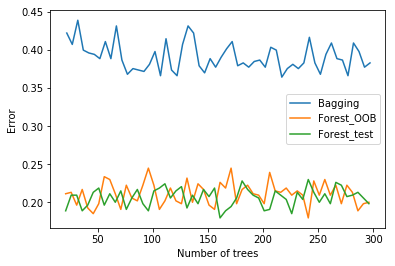

In [9]:
Names=["Bagging","Forest_OOB","Forest_test"]
plotting(Tree[20::5],Trees[::5],Trees[::5],E_bag[20::5],E_forest_obb[::5],E_for_test[::5],Names)

In [23]:
numero=100
Trees,E_forest_obb_1,E_for_test = Random_Forest(X,Y,numero,False,"sqrt")
Trees,E_forest_obb_2,E_for_test_2 = Random_Forest(X,Y,numero,False,16)
Trees,E_forest_obb_3,E_for_test_3 = Random_Forest(X,Y,numero,False,8)

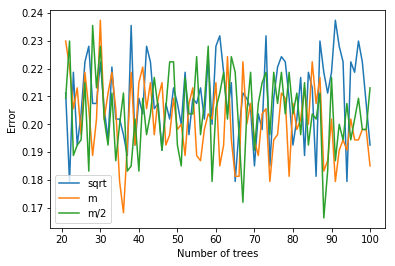

In [24]:
Names=["sqrt","m","m/2"]
plotting(Trees,Trees,Trees,E_for_test,E_for_test_2,E_for_test_3,Names)

Empezamos el nuevo data set

In [10]:
data2 = np.loadtxt('reprocessed.hungarian.data')
a = data2[:,-1] != 0. 
data2[:,-1][a] = np.round(1)
Y_1 = np.int_(np.array(data2[:,-1]))
X_1 = np.array(data2[:,:-1])

In [27]:
numero=100
Tree,E_bag=Bagging(X_1,Y_1,1,0,numero,False)
Trees,E_forest_obb,E_for_test = Random_Forest(X_1,Y_1,numero,False,"sqrt")

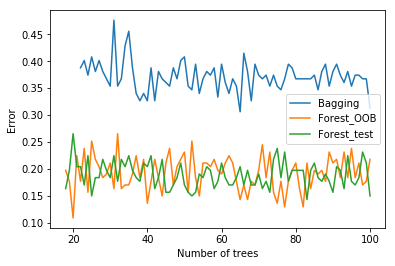

In [28]:
Names=["Bagging","Forest_OOB","Forest_test"]
plotting(Tree[20::],Trees[::1],Trees[::1],E_bag[20::],E_forest_obb[::1],E_for_test[::1],Names)

In [30]:
numero=100
Trees,E_forest_obb_1,E_for_test = Random_Forest(X_1,Y_1,numero,False,"sqrt")
Trees,E_forest_obb_2,E_for_test_2 = Random_Forest(X_1,Y_1,numero,False,13)
Trees,E_forest_obb_3,E_for_test_3 = Random_Forest(X_1,Y_1,numero,False,7)

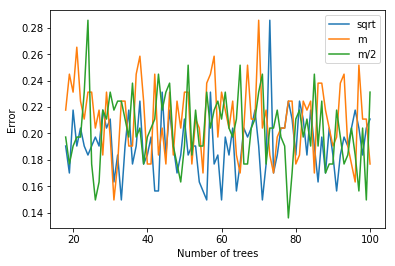

In [31]:
Names=["sqrt","m","m/2"]
plotting(Trees,Trees,Trees,E_for_test,E_for_test_2,E_for_test_3,Names)

## Segunda parte

Hacemos uso de los datos usados anteriormente y hacemos ajusted de tipo Logistic, LDA, TreeClasiffication y Random forest

In [49]:
def Proba_umbral(X,Y,umbral,Yes,No):
    clf = LogisticRegression(solver='lbfgs').fit(X,Y)
    nuevo = np.array([Yes]*len(X))
    a = clf.predict_proba(X)[:,1]<=umbral
    nuevo[a] = No
    return nuevo

In [50]:
delta = 0.1
E_T = []
TPR = []
Prec=[]
a = delta
a_list=[]
for i in range(50):
    Y_prec = Proba_umbral(X_1,Y_1,a,1,0)
    CMatrix = confusion_matrix(Y_1, Y_prec)
    error_T=(CMatrix[0,1] + CMatrix[1,0])/len(X)
    a += 0.1
    TPR.append(CMatrix[0,0]/(CMatrix[1,0] + CMatrix[0,0]))
    Prec.append(CMatrix[0,0]/(CMatrix[0,0]+CMatrix[0,1]))
    a_list.append(a)
    E_T.append(error_T)

/srv/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/srv/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/srv/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/srv/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/srv/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/srv/conda

Text(0, 0.5, 'Recall')

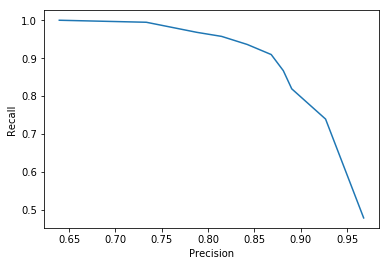

In [52]:
plt.plot(TPR,Prec)
plt.xlabel('Precision')
plt.ylabel('Recall')

In [85]:
max_bootstraps = 50
E_test_list = []
bootstraps_list = []
for bootstraps in range(2, max_bootstraps + 1):
    X_train, X_test, y_train, y_test=train_test_split(X, Y, test_size=0.5)
    clf = DecisionTreeClassifier()
    Y_prec=Boot_strap_func(X,Y,"CH","MM",bootstraps)
    cm_test = confusion_matrix(y_test, Y_prec)
    E_test_list.append((cm_test[0,1] + cm_test[1,0])/(cm_test[0,0] + cm_test[0,1] + cm_test[1,0] + cm_test[1,1]))
    bootstraps_list.append(bootstraps)

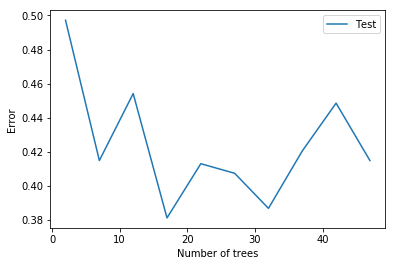

In [86]:
plt.plot(bootstraps_list[::5], E_test_list[::5], label='Test')
plt.xlabel('Number of trees')
plt.ylabel('Error')
plt.legend()
plt.show()

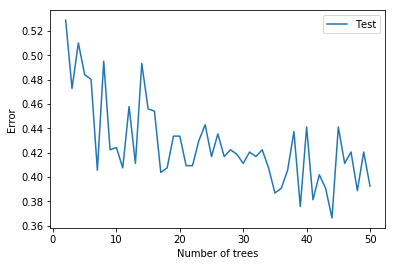

In [87]:
Bagging(X,Y,"CH","MM",50,True)

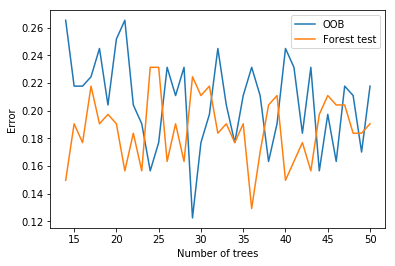

In [135]:
clf = RandomForestClassifier(n_estimators=20,oob_score=True,max_features="sqrt")#n_estimators es el numero de arboles que puede hacer.
clf.fit(X,Y)
error=1-clf.oob_score_
error
Random_Forest(X,Y,50,True)

In [90]:
inicio=1
fin = 100
Tree=np.linspace(inicio,fin,fin-inicio,dtype=int)
Trees=[]
Err_forest = []
m=int(np.sqrt(len(X[0,:])))
for i in Tree:
    clf = RandomForestClassifier(n_estimators=i,oob_score=True,max_features=m)
    if i<= m**2:
        continue
    else:
        clf.fit(X,Y)
        Err_forest.append(1-clf.oob_score_)
        Trees.append(i)

/srv/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/srv/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


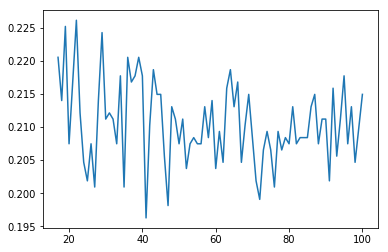

In [91]:
plt.plot(Tree[(len(Tree)-len(Err_forest)):],Err_forest)

In [72]:
data2 = np.loadtxt('reprocessed.hungarian.data') #quitar el .txt si el archivo no lo tiene
aa = data2[:,-1] != 0. 
data2[:,-1][aa] = np.round(1)
Y2 = np.int_(np.array(data2[:,-1]))
X2 = np.array(data2[:,:-1])

19

In [73]:
oob_score=True

In [ ]:
Y2 = np.int_(np.array(data2[:,-1]))
max_n_trees = 200
oob_list = []
rfE_test_list = []
n_trees_list = []
for n_trees in range(2, max_n_trees + 1):
    rf_clf = RandomForestClassifier(n_estimators=n_trees, oob_score=True, max_depth=4)
    X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size=0.5)
    rf_clf.fit(X2_train,Y2_train)
    Y2_rf_pred = rf_clf.predict(X2_test)
    rf_cm_test = confusion_matrix(Y2_test, Y2_rf_pred)
    rfE_test_list.append((rf_cm_test[0,1] + rf_cm_test[1,0])/(rf_cm_test[0,0] + rf_cm_test[0,1] + rf_cm_test[1,0] + rf_cm_test[1,1])) 
    n_trees_list.append(n_trees)
    oob_list.append(1 - rf_clf.oob_score_)